<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Week 5 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 16 February 2020</div>

# Mechanics of the KS test
<br />
<center>
<img src="ipynb.images/higgs.jpeg" width=600 />
    The Higgs boson decays into two jets of hadrons and two electrons (CMS, CERN)
</center>

[Student's **t-test**](https://en.wikipedia.org/wiki/Student%27s_t-test) is the famout test that yields **p-values** and which lets you conclude on whether two datasets are statistically *similar* or not. However, it makes an assumption on the distribution of the data. When we compare two datasets, the t-test assumes that situations produce **normal** or at least **Student-T**-distributed data, which differ only in the sense that the average outcome in one situation is different from the average outcome of the other situation.

The [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), also known as the **KS** test also attempts to determine if two datasets differ significantly. The KS-test has the advantage of making *no* assumption about the distribution of data. We say that it is **non-parametric** and **distribution-free**. This generality comes at a cost: other tests, like Student's t-test may be *more sensitive* if the data meet the requirements of the test.

>What a mess! That is why we need Bayesian statistics! However, you *need* to also learn about classical statistics, since they are very commonly in use in industry.

The KS test uses the [cumulative distribution function] of a dataset to make an estimation. This notebook shows you what it does.
'
Typically, you run t-tests on datasets in order to uncover p-values. If you apply the t-test to data drawn from *non-normal distributions* (and people still do that), you are increasing the risk of errors. According to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), the t-test becomes more robust as the control/treatment groups become sufficiently large, because our distributions get closer and closer to being normal. In other words, if the control/treatment datasets are sufficiently *large* the t-test does not lie outrageously even when applied to non-normal data. Thus the t-test is called a *robust* test, since it continues to work well in situations different from those narrow situations for which it was created. However, there *are* situations where you ought to *doubt* the results of a t-test! 

Let's look at some of these situations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

%matplotlib inline

## Same mean, same distribution

Both samples, **treatment** and **control** (or placebo) groups below are generated from normal distributions having close to the same mean, however visually it is clear from the data *and* its histograms that both samples are different. A t-test might not be able to pick up on this difference and confidently say that both samples are identical.

A t-test with `scipy.ttest.ttest_ind` on these samples gives a p-value larger than 0.05. We therefore cannot reject the null hypothesis of identical average scores.

In [2]:
group_a = np.random.normal(loc=0, scale=1.0, size=20)
group_b = np.random.normal(loc=0, scale=3.0, size=20)

print('group a: \n{}'.format(np.sort(group_a)))
print('group b: \n{}'.format(np.sort(group_b)))

group a: 
[-1.91642455 -1.86525731 -1.51942399 -1.24856723 -0.9901949  -0.79413364
 -0.54063932 -0.32852529  0.16343587  0.19971412  0.38046798  0.46130573
  0.60897536  0.64113979  0.65013974  0.83696767  0.99362222  1.02127529
  1.29388497  1.81720023]
group b: 
[-6.04078188 -5.63112843 -2.56275964 -2.37113527 -2.20997077 -1.88073204
 -0.94999486 -0.4177723   0.33777911  0.87345192  1.20097231  1.24354663
  1.37640014  1.62866925  2.0479146   2.1971959   2.62936529  3.55082096
  3.85874762  5.34896838]


In [5]:
group_a.mean()

-0.0067518626394237335

In [6]:
group_b.mean()

0.2114778462170325

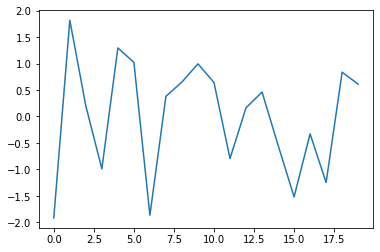

In [10]:
plt.plot(group_a)

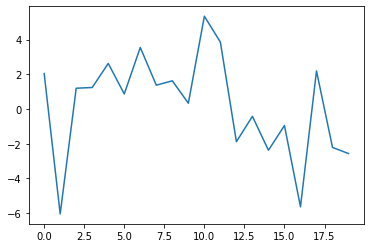

In [11]:
plt.plot(group_b)

(array([2., 2., 1., 2., 1., 2., 5., 3., 1., 1.]),
 array([-1.91642455, -1.54306208, -1.1696996 , -0.79633712, -0.42297464,
        -0.04961216,  0.32375032,  0.69711279,  1.07047527,  1.44383775,
         1.81720023]),
 <a list of 10 Patch objects>)

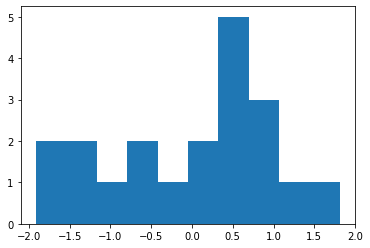

In [4]:
plt.hist(group_a)

(array([2., 0., 0., 4., 2., 1., 5., 3., 2., 1.]),
 array([-6.04078188, -4.90180685, -3.76283183, -2.6238568 , -1.48488177,
        -0.34590675,  0.79306828,  1.9320433 ,  3.07101833,  4.20999335,
         5.34896838]),
 <a list of 10 Patch objects>)

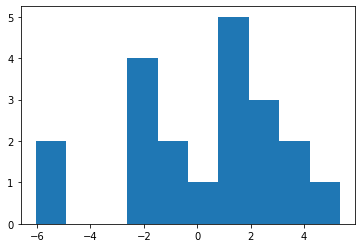

In [7]:
plt.hist(group_b)

In [8]:
ttest_ind(group_a, group_b, equal_var=False)

Ttest_indResult(statistic=-0.3071575212564344, pvalue=0.7613806234429593)

76% is a really large value! It should be interpreted as "*I have no idea, buddy!*". You may ***not*** conclude. You ***cannot reject the null hypothesis*** that the two datasets are different.

Let's try again with really large samples and see if the t-test works this time.

In [9]:
ttest_ind(np.random.normal(loc=0, scale=1.0, size=100_000),
          np.random.normal(loc=0, scale=2.0, size=100_000),
          equal_var=False)

Ttest_indResult(statistic=1.1175911452559575, pvalue=0.26374347754602356)

The null hypothesis was that two samples are similar. The p-value for the large samples is 26%. A p-value higher than 0.05 is not statistically significant and indicates **weak** evidence against the null hypothesis. This means we fail to reject the null hypothesis and cannot accept the alternative hypothesis.

<br />
<center>
<img src="ipynb.images/home-alone.jpg" width=300 />
</center>

## Different mean, same distribution
Say we generate two small datasets that differ in mean, but a non-normal distribution masks the difference as shown in the code below

In [3]:
#samples from lognormal
lognorm_a = np.random.lognormal(mean=3, sigma=10, size=20)
print('group a: \n{}'.format(np.sort(lognorm_a)))

lognorm_b = np.random.lognormal(mean=8, sigma=10, size=20)
print('group a: \n{}'.format(np.sort(lognorm_b)))

group a: 
[5.85954361e-06 2.48464182e-05 1.71899087e-03 1.04237029e-02
 2.28260674e-02 5.61582511e-02 5.72310349e-02 6.59611554e-01
 8.40942444e-01 8.89308964e-01 1.85205650e+00 3.01425244e+00
 8.81482079e+00 1.50652264e+01 6.32426820e+01 7.33065169e+01
 3.43601873e+04 4.01450697e+06 2.15480673e+09 1.60201761e+17]
group a: 
[5.92260755e-06 1.47731721e-04 1.15360235e-03 2.04714041e-01
 4.70311686e-01 6.33403106e-01 7.88370774e+00 4.99098720e+02
 8.28707785e+03 1.37560206e+04 4.10853695e+04 8.01716135e+04
 3.64879883e+05 4.45130671e+05 2.34681414e+06 1.44689078e+07
 4.43374417e+07 3.28555990e+09 6.02094332e+09 3.06259700e+12]


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.85954361e-06, 1.60201761e+16, 3.20403523e+16, 4.80605284e+16,
        6.40807046e+16, 8.01008807e+16, 9.61210569e+16, 1.12141233e+17,
        1.28161409e+17, 1.44181585e+17, 1.60201761e+17]),
 <a list of 10 Patch objects>)

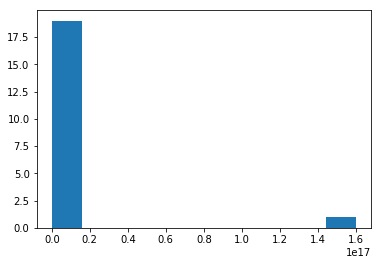

In [7]:
plt.hist(lognorm_a)

(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.92260755e-06, 3.06259700e+11, 6.12519400e+11, 9.18779100e+11,
        1.22503880e+12, 1.53129850e+12, 1.83755820e+12, 2.14381790e+12,
        2.45007760e+12, 2.75633730e+12, 3.06259700e+12]),
 <a list of 10 Patch objects>)

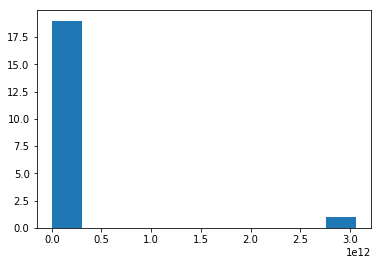

In [8]:
plt.hist(lognorm_b)

Wow, these look very similar! And yet..

In [9]:
ttest_ind(lognorm_a, lognorm_b)

Ttest_indResult(statistic=0.9999808383979747, pvalue=0.32364523635864795)

14% is *not* 5%, and we cannot reject the null hypothesis!

<br />
<center>
<img src="ipynb.images/home-alone.jpg" width=300 />
</center>

>**NOTE**: Of course, if we knew in advance that the data was not normally distributed we would not be using the t-test to begin with, right?!

Okeedokeeee.. SO the t-test does not work sometimes! And so, we turn to the KS-test instead:

## The KS Test
The [Kolmogorov-Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) (KS) test is a non-parametric and distribution-free test: It makes *no* assumption about the distribution of data. The KS test can be used to compare a sample with a reference probability distribution, or to compare two samples.

Suppose we have observations $x_1, x_2, \cdots x_n$ that we think come from a distribution P. The KS test is used to evaluate:
- Null Hypothesis: The samples do indeed come from P
- Alternative Hypothesis: The samples do not come from P

To build intuition for the KS test, we take a step back and consider **descriptive statistics**. Distributions such as the normal distribution are known to be well-behaved: We expect no more than 15% of the data to lie more than 1 standard deviation below the mean.

Let's leverage the [Cumulative Distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF): It is not the pdf of the datapoints, but rather the *area* under the pdf.

The cumulative distribution function $F$ of a random variable $y$ is:

$$F(x) = P(y ≤ x).$$

We will use the Empirical Distribution Function (EDF): an *estimate* of the cumulative distribution function that generated datapoints in the sample.

Given observations $x_1, \cdots, x_n$ the empirical distribution function $F_{obs}(x)$ gives the proportion of the data that lies below $x$:

$$F_{obs}(x) = \frac{\# \text{observations below }x}{\# \text{observations}}$$

If we order the observations $y_1 ≤ y_2 ≤ · · · ≤ y_n$, then

$$F_{obs}(y_i) = \frac{i}{n}$$

We want to compare the empirical distribution function of the observed data, $F_{obs}$, with the cumulative distribution function associated with the null hypothesis, $F_{exp}$ (***exp***ected CDF).

The Kolmogorov-Smirnov statistic is nothing more than:

$$D_n = \text{max}_x |F_{exp}(x) − F_{obs}(x)|$$

Now, compute the [critical value](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing). In statistical hypothesis testing, the critical values of a statistical test are the boundaries of the acceptance region of the test. The acceptance region is the set of values of the test statistic for which the null hypothesis is *not* rejected. 

At the 95% level the critical value is approximately given by

$$D_{crit,\;0.05} = \frac{1.36}{\sqrt(n)}$$
.
Compare $D_{crit}$ and $D_n$. If $D_n < D_{crit}$, you *cannot* reject the null hypothesis.

## Test if Sample Belongs to a Distribution
Let the null hypothesis be that our samples come from a normal distribution $N(0,1)$.

We will compare the empirical distribution function of the observed data, with the cumulative distribution function associated with the null hypothesis.

Here is the method to set up this experiment:
- Sort the observations in ascending order
- Calculate the EDF of the observations
- For each observation $x_i$ compute $F_{exp}(x_i) = P(Z ≤ x_i)$
- Compute the absolute differences
- Record the maximum difference
- Calculate the **critical value**
- Reject or accept null hypothesis

Let's illiustrate the process. Let's generate a random array from a normal distribution:

In [10]:
arr_1 = np.random.normal(0, 1.0, size=100)

In [11]:
arr_1_edf = np.arange(1/len(arr_1), 1+1/len(arr_1), 1/len(arr_1))
arr_1_edf

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

Sort:

In [12]:
arr_1_sorted = np.sort(arr_1)

Get the cdf based on a normal distribution:

In [13]:
cdf_null_hyp = [st.norm.cdf(x) for x in arr_1_sorted]

Calculate the absolute difference:

In [14]:
arr_dif_abs = np.abs(cdf_null_hyp - arr_1_edf)

Get the maximum difference (the KS statistic):

In [15]:
dn_ks = max(arr_dif_abs)
dn_ks

0.04626050858730002

Evaluate the critical value $D_{crit}$. If the KS statistic is less than $D_{crit}$, we fail to reject the null hypothesis. 

The critical value at 95% is approximated by:

In [47]:
dn_crit = 1.36/np.sqrt(len(arr_1))
dn_crit

0.136

dn_ks ***is*** less than dn_crit, so we fail to reject the null hypothesis, ***as we should***: The observations were drawn from a normal distribution!

The plot below shows a visual representation of what we are doing. The observed values F_obs are represented by the blue curve whereas the theoretical values F_exp are represented by the orange curve. The vertical green lines are the differences between observed and theoretical. The differences are ***small***.

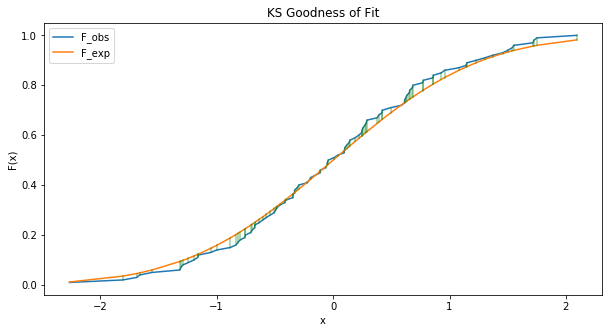

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(arr_1_sorted, arr_1_edf, label='F_obs')
plt.plot(arr_1_sorted, cdf_null_hyp, label='F_exp')
for x, y1, y2 in zip(arr_1_sorted, arr_1_edf, cdf_null_hyp):
    plt.plot([x, x], [y1, y2], color='green', alpha=0.4)
plt.legend()
plt.ylabel("F(x)")
plt.xlabel('x')
plt.title("KS Goodness of Fit")
plt.show()

## Test of  two datasets

Given two samples x and y, we wish to test if they are drawn from the same distribution P. The first thing that changes is the formal to approximate 95% critical value:

$$D_{crit, 0.05} = \sqrt{\frac{1}{n_x} + \frac{1}{n_y}} $$

Where $n_x$ and $n_y$ are the number of observations in each sample.

To compute the edf of the two datasets. We use `scipy.stats`' `precentilescore()` API.

In [17]:
x =[1.2, 1.4, 1.9, 3.7, 4.4, 4.8, 9.7, 17.3, 21.1, 28.4]
y = [5.6, 6.5, 6.6, 6.9, 9.2, 10.4, 10.6, 19.3]

x_y = np.sort(np.concatenate((x, y)))
x_y

array([ 1.2,  1.4,  1.9,  3.7,  4.4,  4.8,  5.6,  6.5,  6.6,  6.9,  9.2,
        9.7, 10.4, 10.6, 17.3, 19.3, 21.1, 28.4])

In [18]:
x_cdf = [np.round(st.percentileofscore(x, samp)/100, 1) for samp in x_y]
y_cdf = [np.round(st.percentileofscore(y, samp)/100, 1) for samp in x_y]

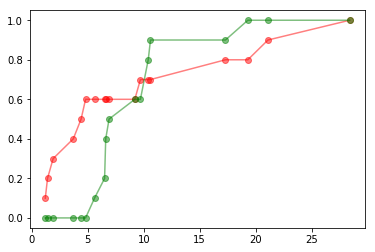

In [19]:
plt.plot(x_y, x_cdf, label='x', alpha=0.5, marker='o', color='red')
plt.plot(x_y, y_cdf, label='y', alpha=0.5, marker='o', color='green')

In [20]:
abs_diff_example = np.abs(np.subtract(x_cdf, y_cdf))
abs_diff_example

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.4, 0.2, 0.1, 0. , 0.1, 0.1,
       0.2, 0.1, 0.2, 0.1, 0. ])

In [21]:
print(max(abs_diff_example))

0.6


In [22]:
def d_crit_two_way(arr1, arr2):
    return 1.36*np.sqrt(len(arr1)**-1 + len(arr2)**-1)

In [23]:
d_crit_two_way(x, y)

0.6451046426743494

0.6 is less than 0.645, so we fail to reject the null hypothesis.

## Two samples

We are now going to randomly generate two random samples from two *known* distributions:
- Normal
- Lognormal

In [24]:
#generate random samples from lognormal and sort
samp_a = np.sort(np.random.normal(loc=0.0, scale=1.0, size=20))
print("samp_a:\n{}".format(samp_a))
print(20*'-')

#generate random samples from lognormal and sort
samp_b = np.sort(np.random.lognormal(mean=0, sigma=1.0, size=25))
print("samp_b:\n{}".format(samp_b))
print(20*'-')

#concatenate and sort
samp_conc = np.sort(np.concatenate((samp_a, samp_b)))
print("samp_conc:\n{}".format(samp_conc))

samp_a:
[-1.62903484 -0.96007044 -0.95536341 -0.68290342 -0.61762434 -0.40896465
 -0.40396607 -0.39747459 -0.09772379  0.07060103  0.39689687  0.55590451
  0.75907184  1.09524316  1.36000401  1.39468263  1.55765157  1.77586589
  1.83804963  1.88012741]
--------------------
samp_b:
[0.26955099 0.31816808 0.33415582 0.35562624 0.37588619 0.3819397
 0.42118884 0.44258143 0.56844205 0.65329054 0.66681918 0.72792839
 0.75471676 0.91072352 1.04570305 1.20604852 1.95815763 2.08443759
 2.16883735 2.27609264 2.3923665  2.9451545  2.97629508 3.03986596
 6.02584272]
--------------------
samp_conc:
[-1.62903484 -0.96007044 -0.95536341 -0.68290342 -0.61762434 -0.40896465
 -0.40396607 -0.39747459 -0.09772379  0.07060103  0.26955099  0.31816808
  0.33415582  0.35562624  0.37588619  0.3819397   0.39689687  0.42118884
  0.44258143  0.55590451  0.56844205  0.65329054  0.66681918  0.72792839
  0.75471676  0.75907184  0.91072352  1.04570305  1.09524316  1.20604852
  1.36000401  1.39468263  1.55765157  1.7

Next, we make use of scipy’s `percentileofscore` to calculate the EDF (empirical CDF) as shown below:

In [25]:
#cdf of sample a
samp_a_cdf = [np.round(st.percentileofscore(samp_a, value)/100, 1) for value in samp_conc]
print('samp_a_cdf:\n{}'.format(samp_a_cdf))
print(20*'-')

#cdf of sample b
samp_b_cdf = [np.round(st.percentileofscore(samp_b, value)/100, 1) for value in samp_conc]
print('samp_b_cdf:\n{}'.format(samp_b_cdf))
print(20*'-')

#compute absolute difference
samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))
print('samp_diff:\n{}'.format(samp_diff))

samp_a_cdf:
[0.0, 0.1, 0.2, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
--------------------
samp_b_cdf:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0]
--------------------
samp_diff:
[0.  0.1 0.2 0.2 0.2 0.3 0.4 0.4 0.4 0.5 0.5 0.4 0.4 0.3 0.3 0.3 0.4 0.3
 0.3 0.3 0.2 0.2 0.2 0.1 0.1 0.1 0.  0.  0.1 0.1 0.2 0.2 0.2 0.3 0.4 0.4
 0.3 0.3 0.2 0.2 0.2 0.1 0.1 0.  0. ]


In [26]:
print(max(samp_diff))

0.5


In [27]:
d_crit_two_way(samp_a, samp_b)

0.40800000000000003

In our case $D_{crit} = 0.408$ and unsurprisingly we get $D_n = 0.6$. Since $D_n$ *is not* less than $D_{crit}$, we *reject* the null hypothesis that both are drawn from the same distribution. Indeed, they weren't, one was normal and the other lognormal!

We plot CDFs and we see ***large*** differences:

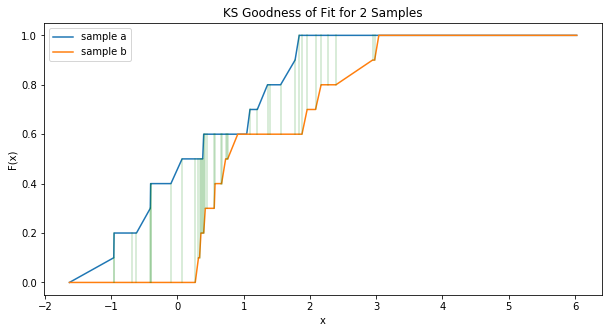

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(samp_conc, samp_a_cdf, label='sample a')
plt.plot(samp_conc, samp_b_cdf, label='sample b')

for val, p1, p2 in zip(samp_conc, samp_a_cdf, samp_b_cdf):
    plt.plot([val, val], [p1, p2], color='green', alpha=0.2)

plt.legend()
plt.ylabel("F(x)")
plt.xlabel('x')
plt.title("KS Goodness of Fit for 2 Samples")

plt.show()

# Conclusion

You usually compute the KS test using a simple call to a library. The scipy package offers the KS test for [goodness of fit](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html) or for [two samples](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ks_2samp.html).

This notebook shows you the mechanics of the KS test to compare a sample with a reference probability distribution, or to compare two samples. 

# References
- [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) 
- [CDF](https://en.wikipedia.org/wiki/Cumulative_distribution_function)